## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [169]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0)
]

In [170]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

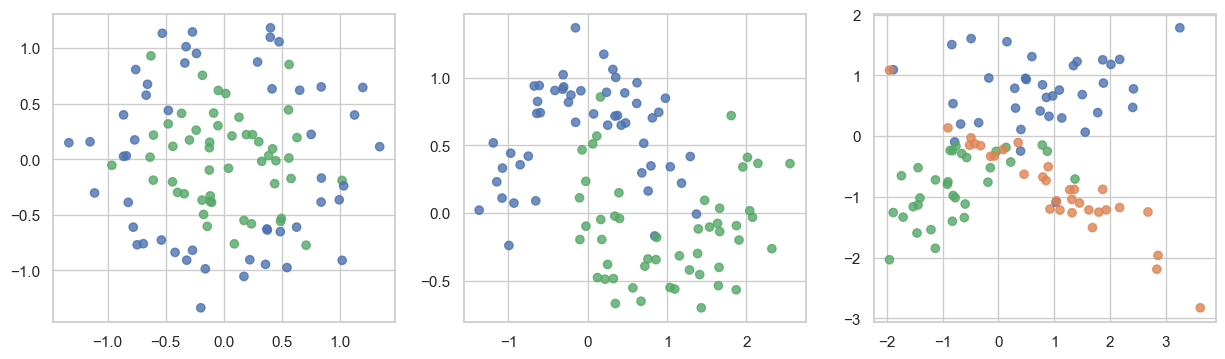

In [171]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [172]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

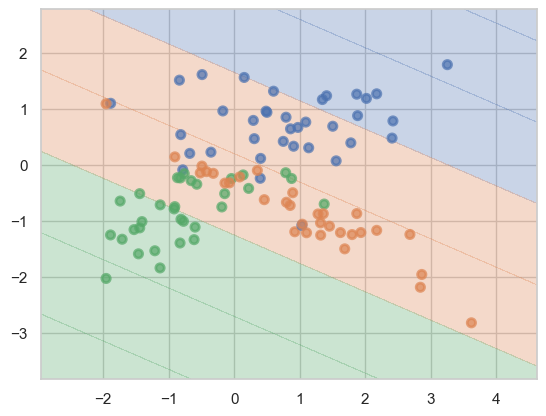

In [173]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

score 1 train - 1.0
score 1 test - 0.7
score 2 train - 1.0
score 2 test - 0.8
score 3 train - 1.0
score 3 test - 0.75


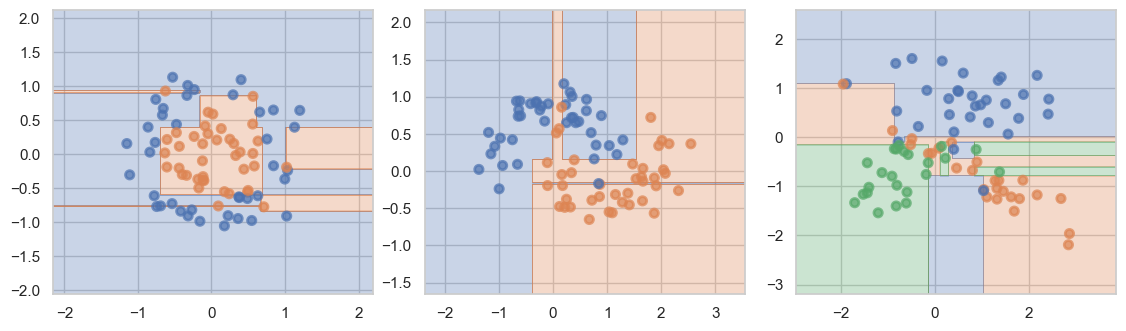

In [174]:
plt.figure(figsize=(12, 4))
for i, data in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    
    X, y = data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    plot_surface(tree, X_train, y_train)

    print(f"score {i + 1} train -", tree.score(X_train, y_train))
    print(f"score {i + 1} test -", tree.score(X_test, y_test))

## Модель переобучилась, так как точность на train и test сильно отличаются

__Ответ:__

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [175]:
max_depth_array = [2, 3, 4]
min_samples_leaf_array = [1, 5, 9]


def count_tree(data):
    X, y = data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
    
    fig = plt.figure(figsize=(12, 12))
    
    for i, max_depth in enumerate(max_depth_array):
        for j, min_samples_leaf in enumerate(min_samples_leaf_array):
            plt.subplot(3, 3, i * 3 + j + 1)

            tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            tree.fit(X_train, y_train)
            
            plot_surface(tree, X_train, y_train)
            
            score_train = round(tree.score(X_train, y_train), 2)
            score_test = round(tree.score(X_test, y_test), 2)
            
            title = f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf}, \n"
            title += f"accuracy: train-{score_train}, test-{score_test}"
            plt.title(title, fontsize=13)

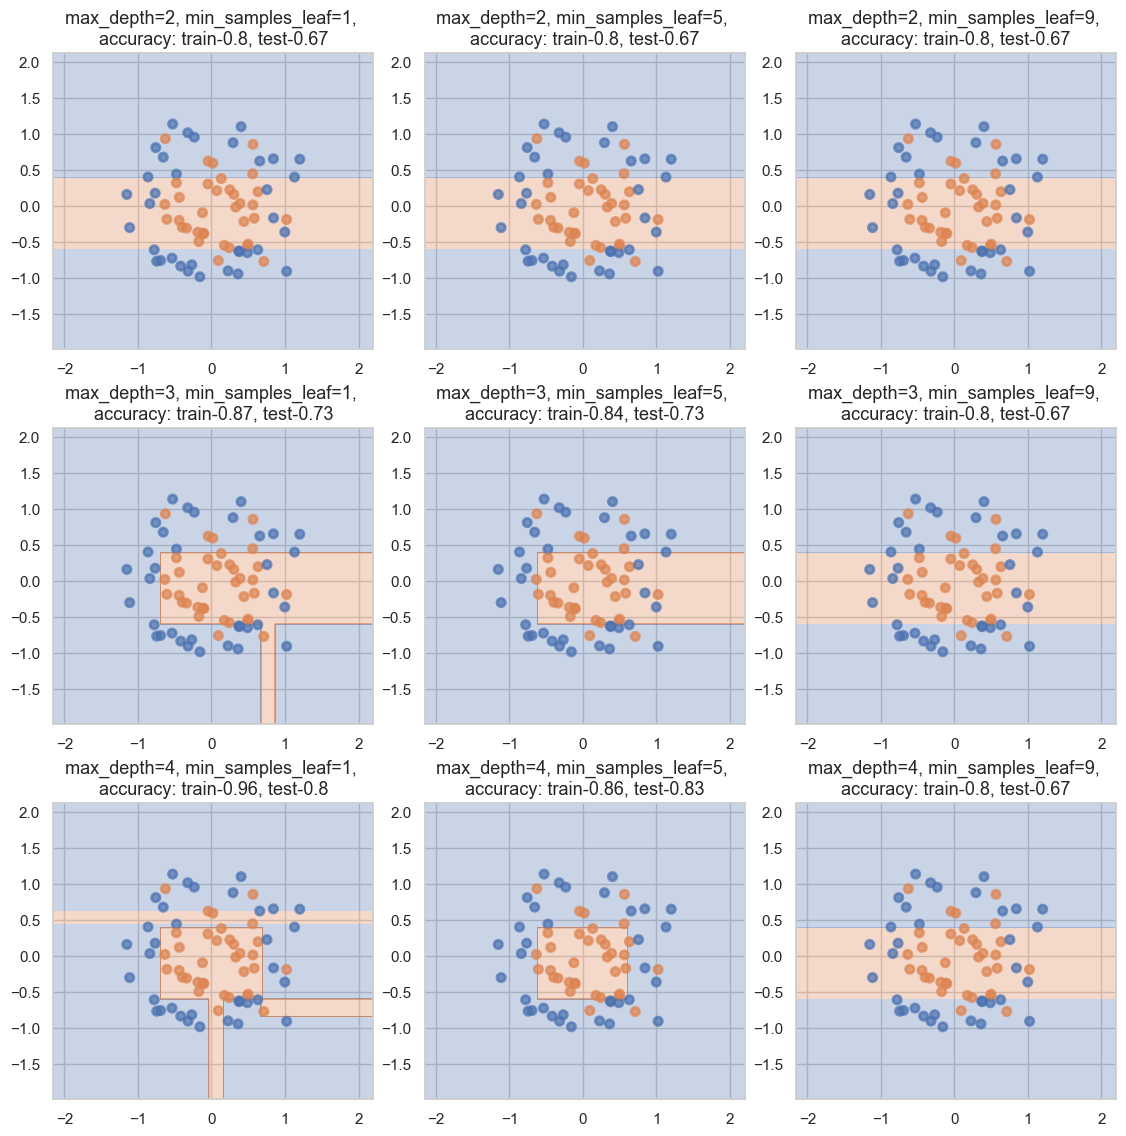

In [176]:
count_tree(datasets[0])

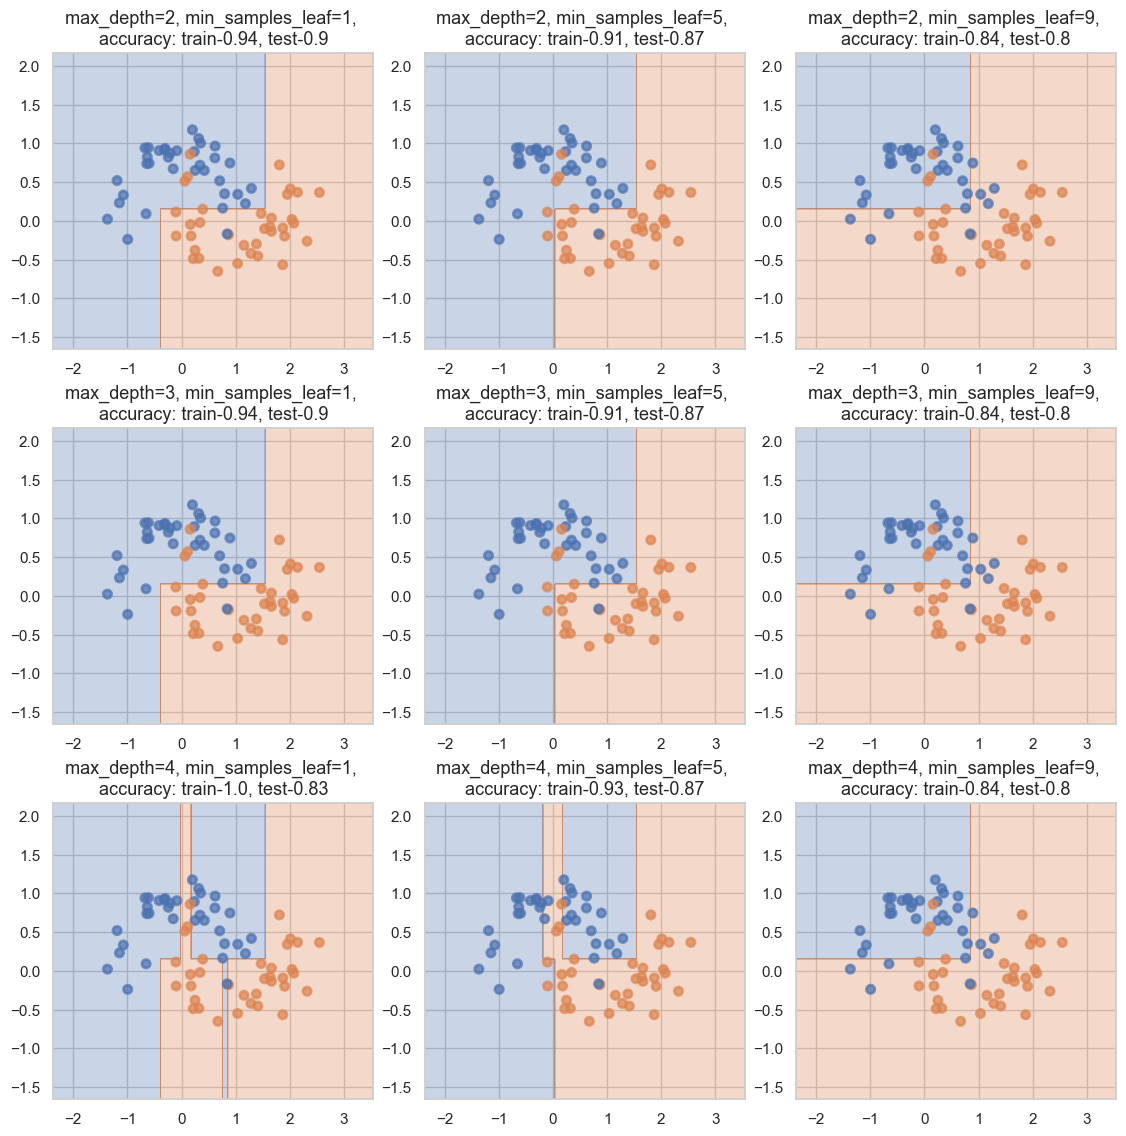

In [177]:
count_tree(datasets[1])

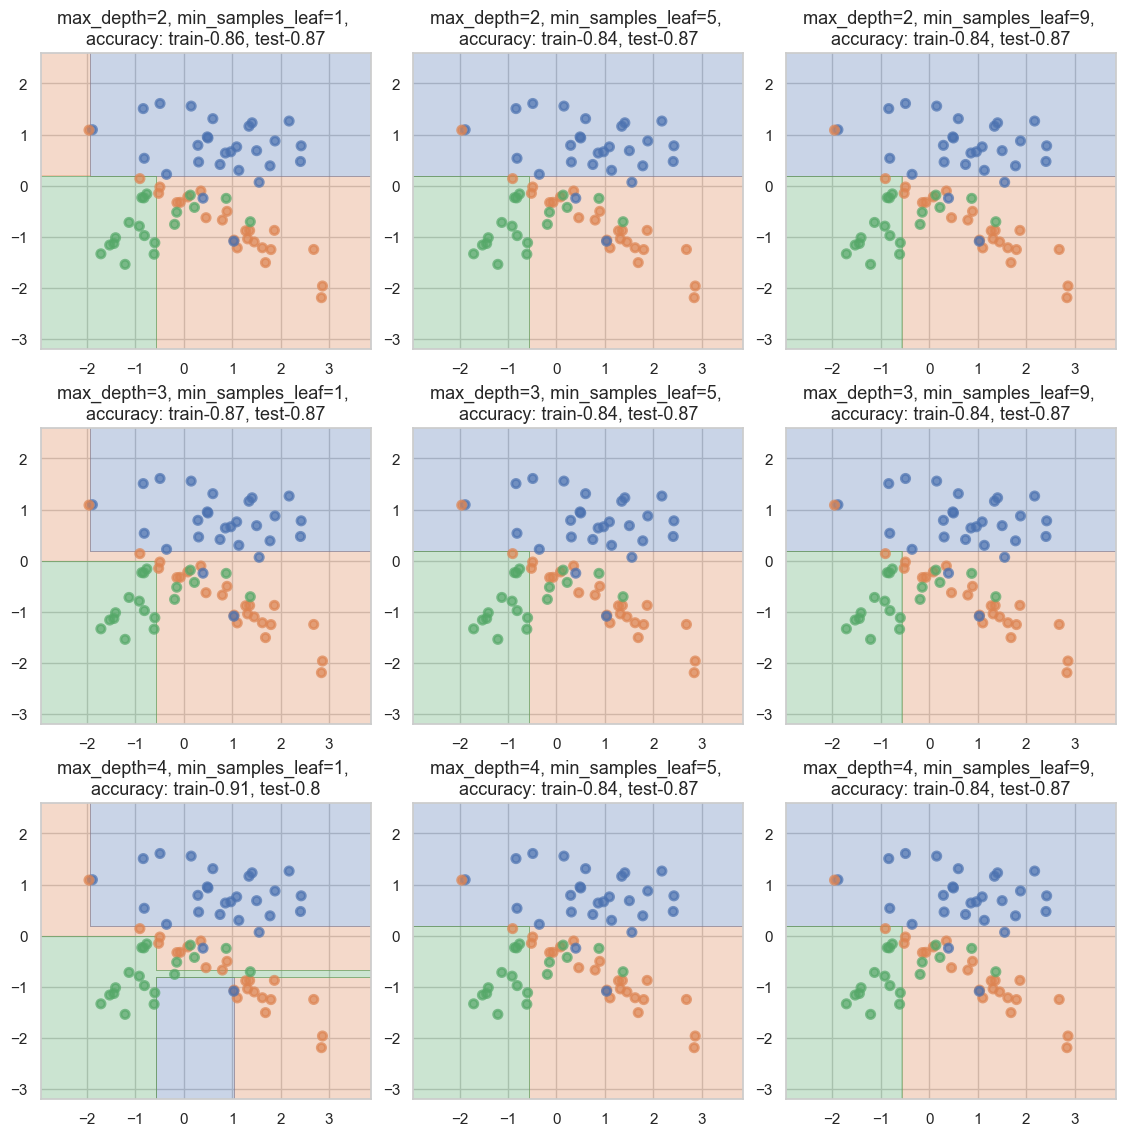

In [178]:
count_tree(datasets[2])

## Гиперпараметры меняют обобщающую способность, это заметно по разделяющей поверхности. Идеальных гиперпараметров нет, для каждой выборки лучшие значения отличаются

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

Под критерием Джини здесь подразумевается следующая функция:
$$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
$R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
 $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

Указания:
* Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
* В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
* Поведение функции в случае константного признака может быть любым.
* При одинаковых приростах Джини нужно выбирать минимальный сплит.
* За наличие в функции циклов балл будет снижен. Векторизуйте! :)

:param feature_vector: вещественнозначный вектор значений признака
:param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

:return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
 разделить на две различные подвыборки, или поддерева
:return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
:return threshold_best: оптимальный порог (число)
:return gini_best: оптимальное значение критерия Джини (число)

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [179]:
import hw5code

In [180]:
xls = pd.ExcelFile('data/students.xls')

train = pd.read_excel(xls, sheet_name='Training_Data')
test = pd.read_excel(xls, sheet_name='Test_Data')
train.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [181]:
last_column = train.columns[-1]

y_train = np.array(train[last_column])
x_train = train.drop(columns=last_column)

y_test = np.array(test[last_column])
x_test = test.drop(columns=last_column)

x_train.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


## Подготовил train и test, разделив данные с признаками и с ключевой переменной

In [182]:
def find_best_split(feature_vector, target_vector):
    def count_H(R):
        p0 = np.sum(R * (target_vector == 0), axis=1) / np.sum(R, axis=1)
        p1 = np.sum(R * (target_vector == 1), axis=1) / np.sum(R, axis=1)
        return 1 - p0 ** 2 - p1 ** 2

    def count_gini(thresholds_local):
        Rl = sort_feature_vector.reshape(1, -1) < thresholds_local.reshape(-1, 1)
        Rr = sort_feature_vector.reshape(1, -1) > thresholds_local.reshape(-1, 1)

        R = target_vector
        answer = -np.sum(Rl, axis=1) / np.sum(R) * count_H(Rl) - np.sum(Rr, axis=1) / np.sum(R) * count_H(Rr)
        return answer

    index_sort = np.argsort(feature_vector)
    sort_feature_vector, target_vector = feature_vector[index_sort], target_vector[index_sort]

    thresholds = (np.roll(np.unique(sort_feature_vector), 1) + np.unique(sort_feature_vector))[1:] / 2

    if len(thresholds) == 0:
        return [], [], -np.inf, -np.inf

    gini = count_gini(thresholds)

    best_index = np.argmax(gini)

    threshold_best = thresholds[best_index]
    gini_best = gini[best_index]

    return thresholds, gini, threshold_best, gini_best

Text(0, 0.5, 'Значение критерия Джини')

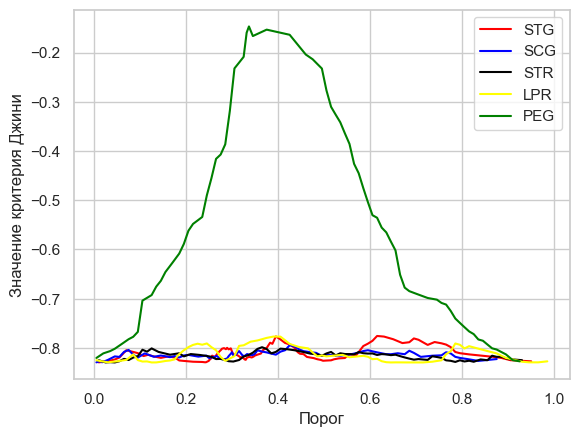

In [183]:
colors = ["red", "blue", "black", "yellow", "green"]
for i, column in enumerate(x_train.columns):
    feature = np.array(x_train[column])
    thresholds, gini, threshold_best, gini_best = hw5code.find_best_split(feature, y_train)
    plt.plot(thresholds, gini, c=colors[i], label=column)
plt.legend()
plt.xlabel("Порог")
plt.ylabel("Значение критерия Джини")

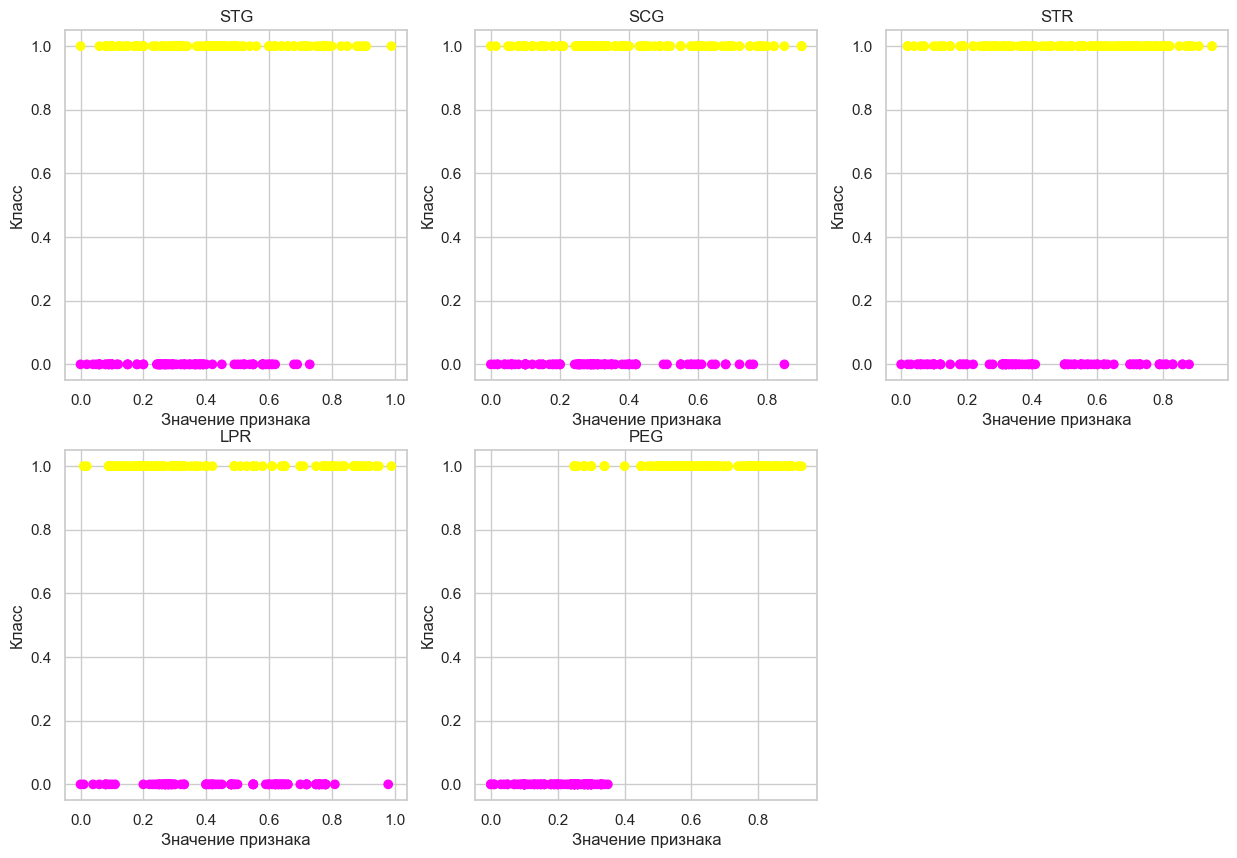

In [184]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(x_train.columns):
    plt.subplot(2, 3, i + 1)
    feature = np.array(x_train[column])
    plt.scatter(feature, y_train, c = y_train, cmap='spring')
    plt.title(column)
    plt.xlabel("Значение признака")
    plt.ylabel("Класс")

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

## Лучший критерий для разделения - "PEG". Это видно по графику с критерием Джини и по последним графикам

### График кривой критерия Джини для "хороших" признаков я бы охарактеризовал как функцию Гаусса, где максимальное значение достигается в нуле. График "значение признака - класс" для идеального признака был бы такой, что его можно разделить вертикальной линией на 2 графика (если у нас 2 класса), где в каждом будут точки отдельного класса
### Критерий Джини для "плохих" признаков выглядел бы как кривая с очень малыми значениями (отрицательными), которая двигается в каком-то определённом коридоре. График "значение признака - класс" нельзя было бы разделить вертикальными линиями (так как точки перемешаны)

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [185]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [186]:
df = pd.read_csv("data/agaricus-lepiota.data")

labelencoder = LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [187]:
Y = np.array(df["p"])
df = df.drop(columns="p")
X = np.array(df)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
x_train.shape, y_train.shape

((4061, 22), (4061,))

## Подготовил данные для train и test

In [188]:
types = ["real"] * x_train.shape[1]
tree = hw5code.DecisionTree(feature_types=types)
tree.fit(x_train, y_train)
print("Accuracy train -", accuracy_score(y_train, tree.predict(x_train)))
print("Accuracy test -", accuracy_score(y_test, tree.predict(x_test)))

Accuracy train - 1.0
Accuracy test - 1.0


## Обучение прошло успешно

__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [189]:
score_df = pd.DataFrame({"real": [0, 0, 0, 0], "categorical": [0, 0, 0, 0],
                         "one-hot": [0, 0, 0, 0], "sklearn + onehot":[0, 0, 0, 0],
                         "sklearn + onehot + GridSearchCV":[0, 0, 0, 0]})
score_df = score_df.set_index(pd.Index(["mushrooms", "tic-tac-toe", "cars", "nursery"]))
score_df

,real,categorical,one-hot,sklearn + onehot,sklearn + onehot + GridSearchCV
mushrooms,0,0,0,0,0
tic-tac-toe,0,0,0,0,0
cars,0,0,0,0,0
nursery,0,0,0,0,0


In [191]:
all_data = {}
url_arr = ["tic-tac-toe.data", "car.data", "nursery.data"]
labelencoder = LabelEncoder()

In [192]:
def add_data(df, index_label, name):
    Y = np.array(labelencoder.fit_transform(df.iloc[:, index_label]))
    X = df.drop(columns=df.columns[index_label])
    all_data[name] = [X, Y]

In [193]:
df_mush = pd.read_csv("data/agaricus-lepiota.data")
add_data(df_mush, 0, "mushrooms")

df_tic = pd.read_csv("data/tic-tac-toe.data")
add_data(df_tic, -1, "tic-tac-toe")

df_car = pd.read_csv("data/car.data")
colomn_label = df_car.columns[-1]
df_car[df_car[colomn_label] == "vgood"] = "good"
df_car[df_car[colomn_label] == "acc"] = "unacc"
add_data(df_car, -1, "car")

df_nursery = pd.read_csv("data/nursery.data")
colomn_label = df_nursery.columns[-1]
df_nursery[df_nursery[colomn_label] == "not_recom"] = "recommend"
df_nursery[(df_nursery[colomn_label] == "very_recom") | (df_nursery[colomn_label] == "priority")] = "spec_prior"
add_data(df_nursery, -1, "nursery")

## Создал таблицу для результатов обучения. Загрузил все данные и разделил целевую переменную на два класса. Все записал в словать "all_data"

In [194]:
for i, name in enumerate(all_data):
    X, Y = all_data[name]
    X = X.copy()
    for item in X.columns:
        X[item] = labelencoder.fit_transform(X[item])
    X = np.array(X)
    types = ["real"] * X.shape[1]
    
    tree = hw5code.DecisionTree(types)
    score = cross_val_score(tree, X, Y, cv=KFold(n_splits=10, shuffle=True, random_state=42),
                            scoring=make_scorer(accuracy_score))
    score_df.iloc[i, 0] = round(np.mean(score), 3)

### В ячейке выше привёл всё в вещественные признаки с помощью LabelEncoder() и обучил, результаты записал в таблицу

In [195]:
for i, name in enumerate(all_data):
    X, Y = all_data[name]
    X = X.copy()
    X = np.array(X)
    
    types = ["categorical"] * X.shape[1]
    
    tree = hw5code.DecisionTree(types)
    score = cross_val_score(tree, X, Y, cv=KFold(n_splits=10, shuffle=True, random_state=42),
                            scoring=make_scorer(accuracy_score))
    score_df.iloc[i, 1] = round(np.mean(score), 3)

### В ячейке выше обучил на категориальных признаков (не изменял их), результаты записал в таблицу

In [196]:
for i, name in enumerate(all_data):
    X, Y = all_data[name]
    X = X.copy()
    X = pd.get_dummies(X)
    X = np.array(X)
    types = ["real"] * X.shape[1]
    
    tree = hw5code.DecisionTree(types)
    score = cross_val_score(tree, X, Y, cv=KFold(n_splits=10, shuffle=True, random_state=42),
                            scoring=make_scorer(accuracy_score))
    score_df.iloc[i, 2] = round(np.mean(score), 3)

### В ячейке выше привёл всё в вещественные признаки с помощью one-hot кодирования и обучил, результаты записал в таблицу

In [197]:
for i, name in enumerate(all_data):
    X, Y = all_data[name]
    X = X.copy()
    X = pd.get_dummies(X)
    X = np.array(X)
    
    tree = DecisionTreeClassifier()
    score = cross_val_score(tree, X, Y, cv=KFold(n_splits=10, shuffle=True, random_state=42),
                            scoring=make_scorer(accuracy_score))
    score_df.iloc[i, 3] = round(np.mean(score), 3)

### В ячейке выше привёл всё в вещественные признаки с помощью one-hot кодирования и обучил с помощью Sklearn (параметры оставил по умолчанию), результаты записал в таблицу

In [198]:
for i, name in enumerate(all_data):
    X, Y = all_data[name]
    X = X.copy()
    X = pd.get_dummies(X)
    X = np.array(X)
    
    tree = DecisionTreeClassifier()
    
    arr = np.linspace(1, 10, 10)
    arr = list(arr.astype(int))
    parameters = {'max_depth':arr + [None], 'min_samples_leaf':arr}

    cv = KFold(n_splits=10, shuffle=True, random_state=42)

    searcher = GridSearchCV(tree, param_grid=parameters, scoring=make_scorer(accuracy_score), cv=cv)
    searcher.fit(X, Y)
    
    score = str(round(searcher.best_score_, 3))
    max_depth = str(searcher.best_params_['max_depth'])
    min_samples_leaf = str(searcher.best_params_['min_samples_leaf'])
    
    answer = f"score = {score}, depth = {max_depth}, leaf = {min_samples_leaf}"
    
    score_df.iloc[i, 4] = answer

### В ячейке выше привёл всё в вещественные признаки с помощью one-hot кодирования и обучил с помощью Sklearn, для каждой выборки подобрал лучшие параметры 'max_depth' и 'min_samples_leaf', результаты записал в таблицу

In [199]:
score_df

,real,categorical,one-hot,sklearn + onehot,sklearn + onehot + GridSearchCV
mushrooms,1.000,1.000,1.000,1.000,"score = 1.0, depth = 6, leaf = 4"
tic-tac-toe,0.878,0.936,0.937,0.938,"score = 0.946, depth = 10, leaf = 1"
cars,0.997,0.998,0.997,0.997,"score = 0.999, depth = 8, leaf = 4"
nursery,1.000,1.000,1.000,1.000,"score = 1.0, depth = 1, leaf = 1"


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

## Любое кодирование хорошо работает для 3 из 4 датасетов. Для tic-tac-toe Данные лучше переводить в вещественные признаки с помощью one-hot кодирования или оставлять их категориальными. Все random_state я зафиксировал, поэтому случайлости нет. 

## Подбор гиперпараметров не сильно повлиял на качество работы алгоритма